<a href="https://colab.research.google.com/github/tetysionc/MNIST/blob/master/MNIST_with_GUI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.utils import to_categorical

import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

<function matplotlib.pyplot.tight_layout>

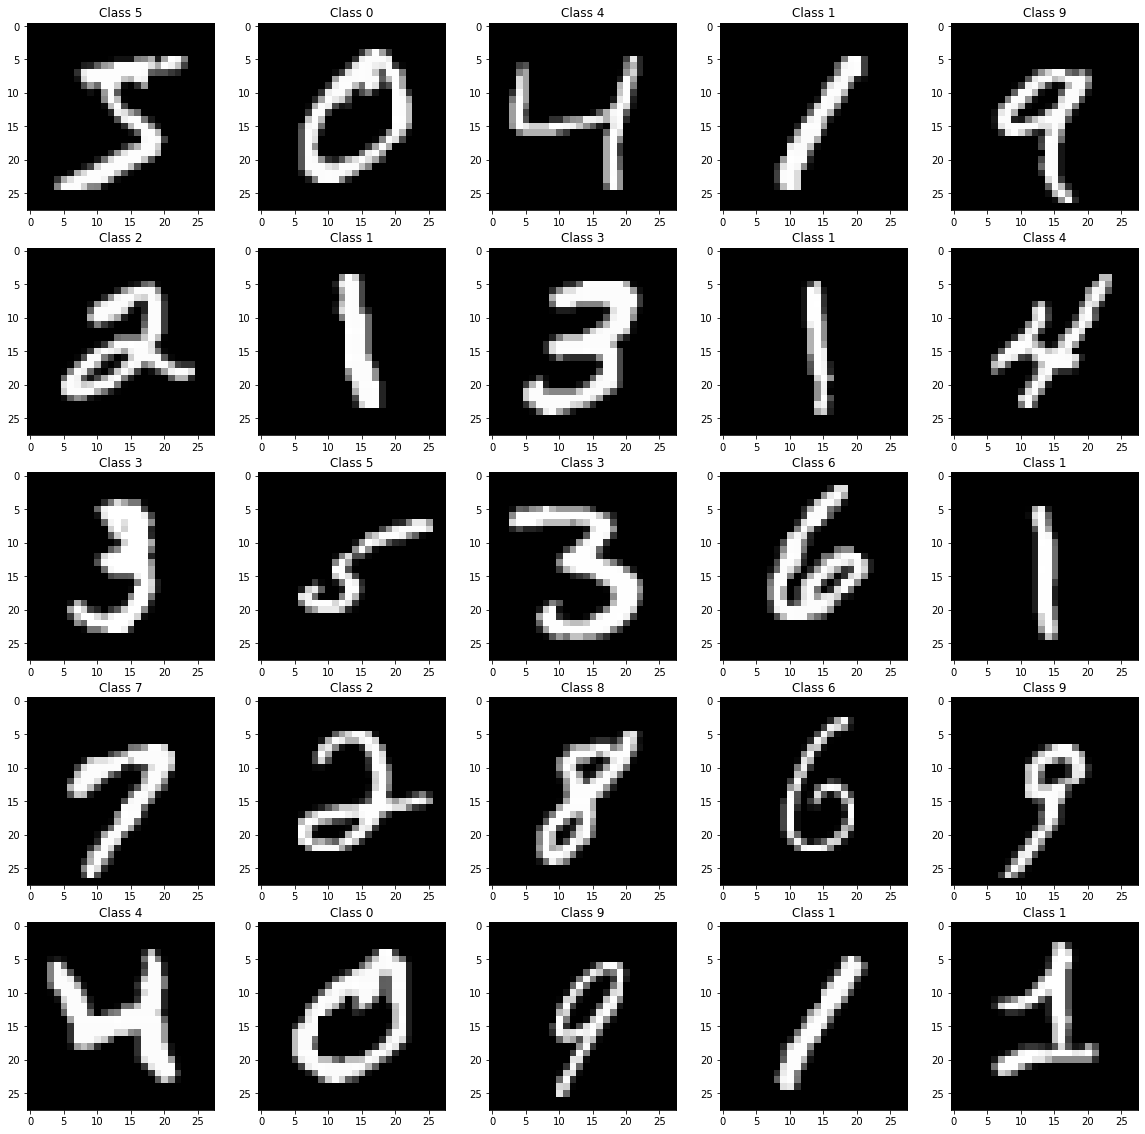

In [3]:
plt.figure(figsize=(20, 20))
for idx in range(25):
  plt.subplot(5, 5, idx+1)
  plt.imshow(X_train[idx], cmap = 'gray')
  plt.title('Class {}'.format(y_train[idx]))

plt.tight_layout

In [4]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

X_train = X_train.reshape(-1, img_rows, img_cols, 1)
X_test = X_test.reshape(-1, img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
if np.max(X_train)>1 :X_train = X_train / 255
if np.max(X_test)>1 :X_test = X_test / 255

In [0]:
if len(y_train.shape)==1:
    num_classes = len(set(y_train))
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

In [0]:
def get_model(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=input_shape),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3)),
    MaxPool2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax'),
    
])

def train_model(model, X_train, y_train, params_fit={}):
  model.compile (loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  model.fit(
      X_train, 
      y_train,
      batch_size = params_fit.get('batch_size', 128),
      epochs = params_fit.get('epochs',10),
      verbose = params_fit.get('verbose', 1),
      validation_data = params_fit.get('validation_data',(X_train, y_train)),
  )
  print("The model has successfully trained")
  model.save('mnist.h5')
  print("Saving the model as mnist.h5")


In [8]:
model = get_model(input_shape, num_classes)
train_model(model, X_train, y_train)

Train on 60000 samples, validate on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.1631 - accuracy: 0.9520 - val_loss: 0.0491 - val_accuracy: 0.9853
Epoch 2/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0442 - accuracy: 0.9868 - val_loss: 0.0245 - val_accuracy: 0.9926
Epoch 3/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0165 - val_accuracy: 0.9949
Epoch 4/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0203 - accuracy: 0.9937 - val_loss: 0.0137 - val_accuracy: 0.9957
Epoch 5/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.0122 - val_accuracy: 0.9961
Epoch 6/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.0066 - val_accuracy: 0.9980
Epoch 7/10
60000/60000 [==============================] - 3s 54us/st

In [9]:
score=model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 56us/step


In [10]:
score

[0.05132947646536731, 0.9883999824523926]

In [11]:
from tkinter import *
from tkinter.ttk import *
import PIL.ImageGrab
from PIL import Image
from keras.models import load_model
import numpy as np

# load model
model = load_model('mnist.h5')

# create global variables 
operator = "Narysowałeś: "
operator2 = ""

# create function to clear canvas and text
def Clear():
    cv.delete("all")
    global operator2
    text_input.set(operator2)

# create function to predict and display predicted number
def Predict():
    file = 'D:/image.jpg'
    if file:
        # save the canvas in jpg format
        x = root.winfo_rootx() + cv.winfo_x()
        y = root.winfo_rooty() + cv.winfo_y()
        x1 = x + cv.winfo_width()
        y1 = y + cv.winfo_height()
        PIL.ImageGrab.grab().crop((x,y,x1,y1)).save(file)
        
        #convert to greyscale
        img = Image.open(file).convert("L")
        
        #resize image
        img = img.resize((28,28))
        
        #convert image to array
        im2arr = np.array(img)
        
        # reshape array
        im2arr = im2arr.reshape(1,28,28,1)
        
        #predict class
        y_pred2 = model.predict_classes(im2arr)
        
        #covert class to scalar
        x = y_pred2[0]
        
        #display predicted number
        global operator
        operator = operator+str(x)
        text_input.set(operator)
        operator = operator = "Narysowałeś: "

# create function to draw on canvas
def paint(event):
    old_x = event.x
    old_y = event.y        
        
    cv.create_line(old_x, old_y, event.x, event.y,
                               width=50, fill="white",
                               capstyle=ROUND, smooth=TRUE, splinesteps=36)

# all interface elements must be between Tk() and mainloop()
root = Tk()

#create string variable
text_input = StringVar()

#create field to display text
textdisplay = Entry(root, 
               textvariable = text_input,  
               justify = 'center')

# create predict and clear buttons

btn1 = Button(root, text = "Magia!", command = lambda:Predict())
btn2 = Button(root, text = "Wyczyść", command = lambda:Clear())


#create canvas to draw on
cv = Canvas(root,width=560,height=560,bg="black",)

#using left mouse button to draw
cv.bind('<B1-Motion>', paint)

#organise the elements
cv.grid(row = 0, column = 0)
textdisplay.grid(row = 0, column = 1)
btn1.grid(row = 1, column = 0)
btn2.grid(row = 1, column = 1)

#this 2 lines for expand the interface
root.rowconfigure(0, weight=2)
root.columnconfigure(1, weight=2)

root.mainloop()

TclError: ignored